In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error

# unscaled data

In [7]:
'upload file from pc'
uploaded = files.upload()
unscaled_data = pd.read_csv(io.BytesIO(uploaded['final data fill nan .csv']))

Saving final data fill nan .csv to final data fill nan .csv


In [8]:
unscaled_data = pd.read_csv('final data fill nan .csv')

In [ ]:
unscaled_data=unscaled_data.drop(['Unnamed: 0'],axis=1)
unscaled_data

In [ ]:
unscaled_data_X=unscaled_data.iloc[:,:276]
unscaled_data_Y=unscaled_data.iloc[:,-1]
# X_train, X_test, Y_train, Y_test = train_test_split(unscaled_data_X,unscaled_data_Y, random_state = 0, shuffle=False)

In [ ]:
a=unscaled_data_X.iloc[:,0]==2019
ind_list=[i for i, unscaled_data_X in enumerate(a) if unscaled_data_X]
test_size=len(ind_list)

In [ ]:
# 2019 Y data choose as test samples other as train 
# Y_train=[i for i in Y[ind_list]]
# Y_test=[i for i in Y[:ind_list[0]-1]]


# PCA

 
*   read data from file
*   apply PCA (so we have 5 componenet)
*   seprate 2019 data as test




In [3]:
unscaled_data = pd.read_csv('final data fill nan .csv')
unscaled_data=unscaled_data.drop(['Unnamed: 0'],axis=1)
unscaled_data_X=unscaled_data.iloc[:,:276]
unscaled_data_Y=unscaled_data.iloc[:,-1]

In [4]:
unscaled_data_X.head(5)

,Year,Budget,Opening Theaters,Running time (min),genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,genre Drama,genre Romance,genre Thriller,genre Mystery,genre Crime,genre Sport,genre Musical,genre Documentary,genre History,genre Music,genre Biography,genre Horror,genre War,genre Western,genre Short,genre News,genre Film-Noir,genre Reality-TV,genre Adult,MPAA PG-13,MPAA PG,MPAA R,MPAA G,MPAA Unrated,MPAA NC-17,MPAA Not Rated,MPAA M/PG,MPAA TV-PG,Day,...,country Latvia,country Jamaica,country Bangladesh,country Macao,country Morocco,country Ecuador,country Laos,country Greenland,country Paraguay,country Mali,country Papua New Guinea,country Mauritania,country Panama,country Cyprus,country Montenegro,country Malawi,country Sierra Leone,country Liberia,country Mongolia,country North Korea,country Vanuatu,country Uruguay,country Congo,country Kazakhstan,country Myanmar,country Kosovo,country Iraq,country Bahrain,country Zimbabwe,country Syria,country Holy See (Vatican City State),country Zambia,country Swaziland,country Republic of North Macedonia,country Reunion,Producer(s) rank,Director(s) rank,Writer(s) rank,Stars rank,Distributor rank
0,2011.0,19.283571,3452.0,162.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2011.0,19.113828,4028.0,103.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2011.0,19.113828,3728.0,108.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011.0,19.113828,4380.0,124.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,2011.0,18.035018,4468.0,124.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.decomposition import PCA

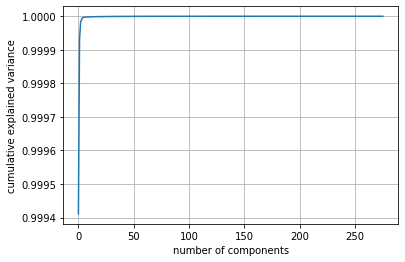

In [6]:
pca = PCA().fit(unscaled_data_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

plt.show()

In [7]:
# pca.explained_variance_ratio_

In [8]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(unscaled_data_X)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4
0,2867.194236,50.831437,1.992957,-5.347069,3.481860
1,3443.068313,-9.418028,1.836468,0.326229,3.650844
2,3143.077045,-3.777739,-11.060864,3.484456,3.967227
3,3795.109765,10.861143,-9.174791,1.574731,3.845897
4,3883.113445,10.637606,13.796744,0.334227,3.647498
...,...,...,...,...,...
7091,-584.023836,-46.887700,-14.499834,3.812596,-3.947041
7092,-583.975377,-24.859228,-2.559708,-5.173353,-4.637612
7093,-583.921736,0.064202,2.617278,5.864927,-3.699278
7094,-583.907805,6.091247,10.560643,-0.161396,-4.184573


In [9]:
# X=principalDf
# X_train, X_test, Y_train, Y_test = train_test_split(X, unscaled_data_Y, random_state = 0, shuffle=True)

In [10]:
a=unscaled_data_X.iloc[:,0]==2019
ind_list=[i for i, unscaled_data_X in enumerate(a) if unscaled_data_X]
# print(ind_list)
X=principalDf
# 2019 Y data choose as test samples other as train 
Y_train=[i for i in unscaled_data_Y[ind_list]]
Y_test=[i for i in unscaled_data_Y[:ind_list[0]-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X, unscaled_data_Y,train_size=len(unscaled_data_Y)-len(ind_list),test_size=len(ind_list), shuffle=False)

from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=0)
X_test,Y_test = shuffle(X_test,Y_test,random_state=0)



In [11]:
len(Y_train)

6332

# linear regression

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, max_error

In [13]:
%%time
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)# fit train data
score=reg.score(X_test,Y_test)
print('score=',score)
coef=reg.coef_
# print('coef=',coef)


score= -0.008389619913057311
CPU times: user 6.14 ms, sys: 60 µs, total: 6.2 ms
Wall time: 6.65 ms


In [14]:
%%time
predict= reg.predict(X_test)

CPU times: user 1.22 ms, sys: 0 ns, total: 1.22 ms
Wall time: 1.18 ms


In [16]:
mean_squared_error(Y_test, predict)

7.286856301734437

In [58]:
from sklearn.model_selection import learning_curve
ns_list=[500,800,1500,2000,2500,3000,4000,5000]
ns_list,train_scores, valid_scores = learning_curve(LinearRegression(), X_train, Y_train,train_sizes = ns_list, scoring='neg_mean_squared_error')

train_scores_mean =-np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =-np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

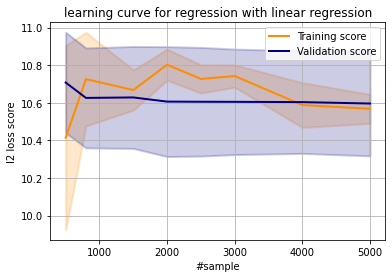

In [62]:
#plot
plt_title = 'learning curve for regression with linear regression'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='#sample', ylabel='l2 loss score', title=plt_title)
plt.plot(ns_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(ns_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('learning_lin_l2_loss.png', dpi = 500)
# plt.savefig('learning_lin_l2_loss.eps', format='eps',dpi=300)
plt.grid()
plt.show()

# sgd regression

In [ ]:
%%time
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, Y_train)

CPU times: user 20.4 ms, sys: 0 ns, total: 20.4 ms
Wall time: 25 ms


In [ ]:
%%time
reg.predict(X_test)
print(reg.score)

<function Pipeline.score at 0x7fe89046eef0>
CPU times: user 2.04 ms, sys: 0 ns, total: 2.04 ms
Wall time: 1.81 ms




# polynomial regression

In [34]:
%%time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

polyreg=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
polyreg.fit(X_train,Y_train)

CPU times: user 12.4 ms, sys: 2 ms, total: 14.4 ms
Wall time: 16 ms


In [35]:
%%time
polyreg.predict(X_test)
print(polyreg.score(X_test,Y_test))

0.5307460739941644
CPU times: user 4.88 ms, sys: 5.87 ms, total: 10.7 ms
Wall time: 9.57 ms


In [37]:
from sklearn.metrics import r2_score
# R2 (test)
r2_score(Y_test,polyreg.predict(X_test))

0.5307460739941644

In [38]:
#R2 (train)
r2_score(Y_train,regr.predict(X_train))

0.589830970016633

In [39]:
# MSE(test)
mean_squared_error( polyreg.predict(X_test),Y_test)

3.3909372531264896

In [40]:
#MSE(train)
mean_squared_error( polyreg.predict(X_train),Y_train)

4.001765325454294

In [109]:
mean_absolute_error( polyreg.predict(X_test),Y_test)

1.4229728477532024

*plot* validation curve and learning curve


1.   loss score vs degrees
2.   loss score vs #sample



In [87]:
%%time
degrees = np.arange(1, 10)
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(polyreg, X_train, Y_train,param_name='polynomialfeatures__degree',
                 param_range=degrees ,  scoring='neg_mean_squared_error' )
train_scores_mean =-np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =-np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

CPU times: user 1min 14s, sys: 9.12 s, total: 1min 24s
Wall time: 43.3 s


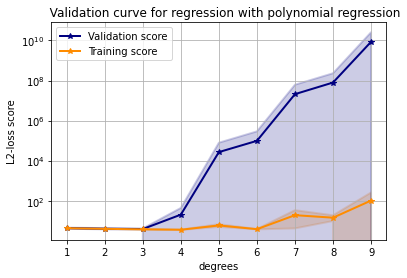

In [89]:
plt_title = '   Validation curve for regression with polynomial regression'#.format(k)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='degrees', ylabel='L2-loss score', title=plt_title)

plt.semilogy(degrees, valid_scores_mean, label="Validation score",marker='*',
             color="navy", lw=2)
plt.semilogy(degrees, train_scores_mean, label="Training score",marker='*',
             color="darkorange", lw=2)
plt.fill_between(degrees, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)

plt.fill_between(degrees, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")

# plt.savefig('validation_poly_l2_loss.eps', format='eps',dpi=300)
plt.grid()

plt.savefig('validation_poly_l2_loss.png', dpi = 300)
plt.show()

In [ ]:
valid_scores_mean

In [ ]:
train_scores_mean

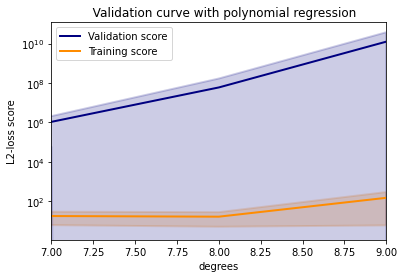

In [41]:
plt_title = '   Validation curve with polynomial regression'#.format(k)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='degrees', ylabel='L2-loss score', title=plt_title)

plt.semilogy(degrees, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.semilogy(degrees, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.xlim(7,9)
plt.fill_between(degrees, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)

plt.fill_between(degrees, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('validation_poly_l2_loss_part2.png', dpi = 300)
# plt.savefig('validation_poly_l2_loss.eps', format='eps',dpi=300)
plt.show()

In [91]:
from sklearn.model_selection import learning_curve
ns_list=[500,800,1500,2000,2500,3000,4000,5000]
ns_list,train_scores, valid_scores = learning_curve(polyreg, X_train, Y_train,train_sizes = ns_list,scoring='neg_mean_squared_error' )

train_scores_mean =-np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =-np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

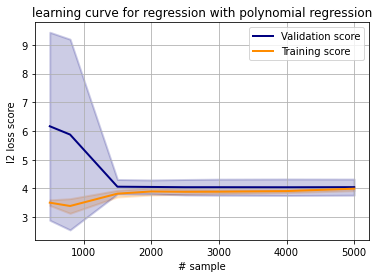

In [92]:
plt_title = 'learning curve for regression with polynomial regression'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='# sample', ylabel='l2 loss score', title=plt_title)
plt.plot(ns_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.plot(ns_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)

plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
# plt.savefig('learning_poly_l2_loss.eps', format='eps',dpi=300)
plt.grid()

plt.savefig('learning_poly_l2_loss.png', dpi = 300)
plt.show()

# SVR

In [17]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np

***polynomial SVR***

In [28]:
#fit data
%%time

svr_poly = SVR(kernel='poly' ,degree=1 ,gamma='auto',epsilon=.1, C=2 )
regr = make_pipeline(MinMaxScaler(),svr_poly)
fit_poly=regr.fit(X_train, Y_train)


CPU times: user 1.87 s, sys: 26.9 ms, total: 1.9 s
Wall time: 1.91 s


In [29]:
#predict data
%%time

predict_poly=regr.predict(X_test)
score_poly=regr.score(X_test,Y_test)
print(score_poly)

0.4845980403643829
CPU times: user 103 ms, sys: 992 µs, total: 104 ms
Wall time: 104 ms


In [30]:
# MSE(test)
mean_squared_error(Y_test, predict_poly)

3.724413602969142

In [31]:
#MSE(train)
mean_squared_error(Y_train, regr.predict(X_train))

4.340829605932672

In [51]:
#MAE(test)
mean_absolute_error(Y_test, predict_poly) 

1.784766931095598


1.784766931095598

In [32]:
#R2(test)
r2_score(Y_test,regr.predict(X_test))

0.4845980403643829

In [33]:
#R2(train)
r2_score(Y_train,regr.predict(X_train))

0.589830970016633

 Gridsearh to find optimum value of parameter (C and degree)

In [19]:
from sklearn.model_selection import GridSearchCV
# svr_rbf = SVR(kernel='poly')
parameters = {'degree':[1,2,3], 'C':[0.0001, 2,10]}
base_estimator = SVR(kernel='poly')
gs=GridSearchCV(base_estimator,
             parameters)

# sh = HalvingGridSearchCV(base_estimator, parameters).fit(X_train, Y_train)
fit=gs.fit(X_train,Y_train) 
print(gs.best_score_)
print(gs.best_params_)

0.5891774661038758
{'C': 2, 'degree': 1}


In [27]:
##validation curve
##metric=mean_squared_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
# opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR
# param_range = np.logspace(-6, -1, 5)
param_range= [1,2,3,4,5,6]
svr_poly = SVR(kernel='poly',C=2)

train_scores, valid_scores = validation_curve(
                                                   estimator = svr_poly, 
                                                   X = X_train, y = Y_train, param_name='degree',param_range=param_range,
                                                   cv = 2,
                                                   scoring = 'neg_mean_squared_error')


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)



CPU times: user 3min 58s, sys: 147 ms, total: 3min 58s
Wall time: 3min 58s


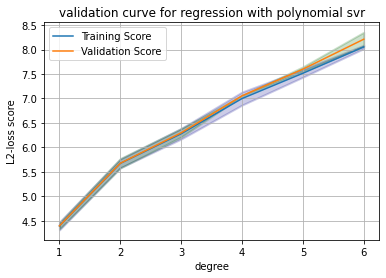

In [173]:
xlabel = 'degree'
ylabel = 'L2-loss score'

plt_title = 'validation curve for regression with polynomial svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(param_range, train_scores_mean, label = 'Training Score')
ax.plot(param_range, valid_scores_mean, label = 'Validation Score')

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.grid()
plt.savefig('valid_polysvr.png')
plt.show()

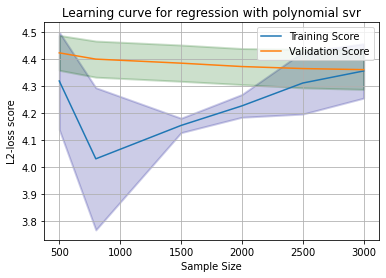

CPU times: user 4.79 s, sys: 48.7 ms, total: 4.84 s
Wall time: 4.89 s


In [47]:
#learning curve
#metric=mean_squared_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
# opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR

svr_poly = SVR(kernel='poly' ,degree=1 , C=2 )
ns_list=[500,800,1500,2000,2500,3000]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_poly, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 2,
                                                   scoring = 'neg_mean_squared_error')


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =- np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Sample Size'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with polynomial svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, valid_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.grid()
plt.savefig('polysvr_learning.png',dpi=300)
plt.show()

***rbf SVR***

In [41]:
#fit data
%%time

svr_rbf = SVR(kernel='rbf', C=10, gamma=0.00001, epsilon=.1)
regr = make_pipeline(svr_rbf)
fit_poly=regr.fit(X_train, Y_train)

CPU times: user 3.33 s, sys: 20.9 ms, total: 3.35 s
Wall time: 3.38 s


In [42]:
#predict data
%%time

predict_rbf=regr.predict(X_test)
score_rbf=regr.score(X_test,Y_test)
print(score_rbf)

0.5357927689006634
CPU times: user 267 ms, sys: 14 µs, total: 267 ms
Wall time: 269 ms


In [43]:
# MSE(test)
mean_squared_error(Y_test, predict_rbf) 

3.3544686700945423

In [46]:
#MSE(train)
mean_squared_error(Y_train,regr.predict(X_train))

3.7027472202970877

In [44]:
#R2(test)
r2_score(Y_test,regr.predict(X_test))

0.5357927689006634

In [45]:
#R2(train)
r2_score(Y_train,regr.predict(X_train))

0.6501239685733886

In [206]:
def mae(y,y_pred):
  return np.sum(np.abs(y-y_pred))/len(y)

mean_absolute_error(Y_test, predict_rbf)   

1.393045947522241

Gridsearch to find optimum value of parameter(gamma and C)

In [212]:
from sklearn.model_selection import GridSearchCV
# svr_rbf = SVR(kernel='rbf')
parameters = {'gamma':[0.00001,2,10], 'C':[0.0001, 2,10]}
base_estimator = SVR(kernel='rbf')
gs=GridSearchCV(base_estimator,
             parameters)

# sh = HalvingGridSearchCV(base_estimator, parameters).fit(X_train, Y_train)
fit=gs.fit(X_train,Y_train) 
print(gs.best_score_)
print(gs.best_params_)

0.6471849754799026
{'C': 10, 'gamma': 1e-05}


In [225]:
#validation curve
#mean_squared_error
%%time
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf',C=10)
param_range = np.logspace(-6, -1, 20)

train_scores, valid_scores = validation_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                    cv = 2,param_name="gamma", param_range=param_range,
                                                   scoring = 'neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

CPU times: user 1min 5s, sys: 71.9 ms, total: 1min 5s
Wall time: 1min 5s


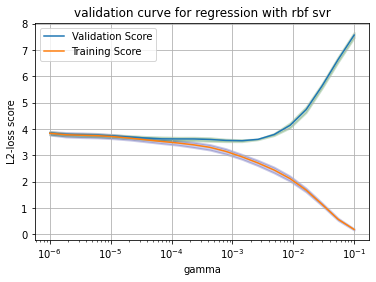

In [228]:
#plot
xlabel = 'gamma'
ylabel = 'L2-loss score'

plt_title = 'validation curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.semilogx(param_range, valid_scores_mean, label = 'Validation Score')
ax.semilogx(param_range, train_scores_mean, label = 'Training Score')



plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)

plt.grid()
# plt.savefig('validation_l2_loss.eps', format='eps',dpi=300)

plt.savefig('validation_gamma_rbf_semilog.png', dpi = 300)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


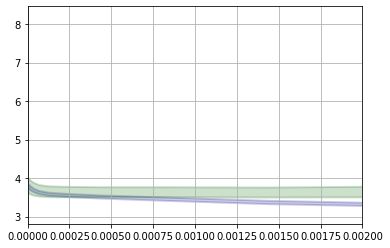

In [128]:
ig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(param_range, valid_scores_mean, label = 'Validation Score')
ax.plot(param_range, train_scores_mean, label = 'Training Score')
plt.xlim(0,0.002)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)

plt.grid()
# plt.savefig('validation_l2_loss.eps', format='eps',dpi=300)

plt.savefig('validation_gamma_l2_loss_part1.png', dpi = 300)
plt.show()

In [215]:
###validation curve/C parameter
###mse
%%time
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf',gamma=0.00001,epsilon=.1)
param_range = np.linspace(0.00001, 11, 20)
train_scores, valid_scores = validation_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                    cv = 2,param_name="C", param_range=param_range,
                                                   scoring = 'neg_mean_squared_error')

train_scores_mean = np.abs(np.mean(train_scores, axis=1))
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =np.abs(np.mean(valid_scores, axis=1))
valid_scores_std = np.std(valid_scores, axis=1)

CPU times: user 55 s, sys: 82.7 ms, total: 55.1 s
Wall time: 54.9 s


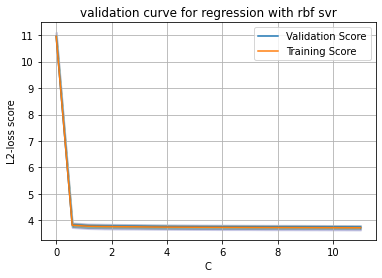

In [223]:
xlabel = 'C'
ylabel = 'L2-loss score'

plt_title = 'validation curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(param_range, valid_scores_mean, label = 'Validation Score')
ax.plot(param_range, train_scores_mean, label = 'Training Score')
# plt.xlim(5,10)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.grid()
# plt.savefig('validation_r2_loss.eps', format='eps',dpi=300)

plt.savefig('validation_C_l2_loss.png', dpi = 300)
plt.show()

In [213]:
#learning curve
#mean_squared_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.00001, epsilon=.1)
ns_list=[500,1000,2000,2500,3000,3500,4000,4500,5000]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =-np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

CPU times: user 57.2 s, sys: 200 ms, total: 57.4 s
Wall time: 57.3 s


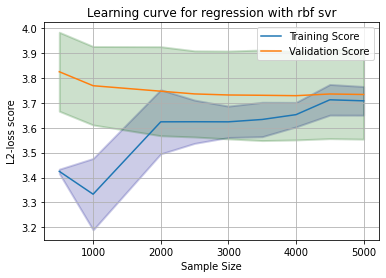

In [214]:
#plot
xlabel = 'Sample Size'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, valid_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.grid()
# plt.savefig('learning_l2_loss.eps', format='eps',dpi=300)

plt.savefig('learning_l2_loss.png', dpi = 300)
plt.show()